# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.subplots as subplots
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go

In [2]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

# Getting Datasets

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
matches=pd.read_csv("/content/drive/MyDrive/matches.csv")
matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
balls=pd.read_csv("/content/drive/MyDrive/deliveries.csv")
balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
balls.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [10]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [11]:
balls.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [12]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [13]:
balls.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

# DATA PRE-PROCESSING 1

In [14]:
print(matches['team1'].unique())
print(matches['city'].unique())
print(balls['batting_team'].unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']


# Correction for Duplicaate teams name and city

In [15]:
matches.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
balls.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.replace({'M. Chinnaswamy Stadium' : 'M Chinnaswamy Stadium'},regex=True,inplace=True)
balls.replace({'M. Chinnaswamy Stadium' : 'M Chinnaswamy Stadium'},regex=True,inplace=True)
matches.replace({'M. A. Chidambaram Stadium' : 'MA Chidambaram Stadium, Chepauk'},regex=True,inplace=True)
balls.replace({'M. A. Chidambaram Stadium' : 'MA Chidambaram Stadium, Chepauk'},regex=True,inplace=True)
matches.replace({'Deccan Chargers' : 'Sunrisers Hyderabad'},regex=True,inplace=True)
matches.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)

In [16]:
matches.replace({'Bangalore':'Bengaluru'},regex=True,inplace=True)
balls.replace({'Bangalore':'Bengaluru'},regex=True,inplace=True)

In [17]:
print(matches['team1'].unique())
print(matches['city'].unique())
print(balls['batting_team'].unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bengaluru'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Kochi Tuskers Kerala'
 'Pune Warriors']
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bengaluru' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali']
['Sunrisers Hyderabad' 'Royal Challengers Bengaluru' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Delhi Capitals']


# Dropping Insignificant Columns

In [18]:
matches=matches.drop(columns=['umpire3'],axis=1)

# Dropping Insignificant Rows

In [19]:
matches=matches[matches['winner'].isna()==False]

# Replacing Null value of Cities by Imputation

In [20]:
#Filling the values of city based on venue
conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
matches['city'] = np.where(matches['city'].isnull(),
                              np.select(conditions, values),
                              matches['city'])

In [21]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            2
umpire2            2
dtype: int64

# EDA

**Which stadium hosted the most number of IPL matches?**

In [22]:
venue_count=matches['venue'].value_counts()
venue_count

M Chinnaswamy Stadium                                   77
Eden Gardens                                            77
Wankhede Stadium                                        73
Feroz Shah Kotla                                        66
MA Chidambaram Stadium, Chepauk                         57
Rajiv Gandhi International Stadium, Uppal               56
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

In [23]:
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



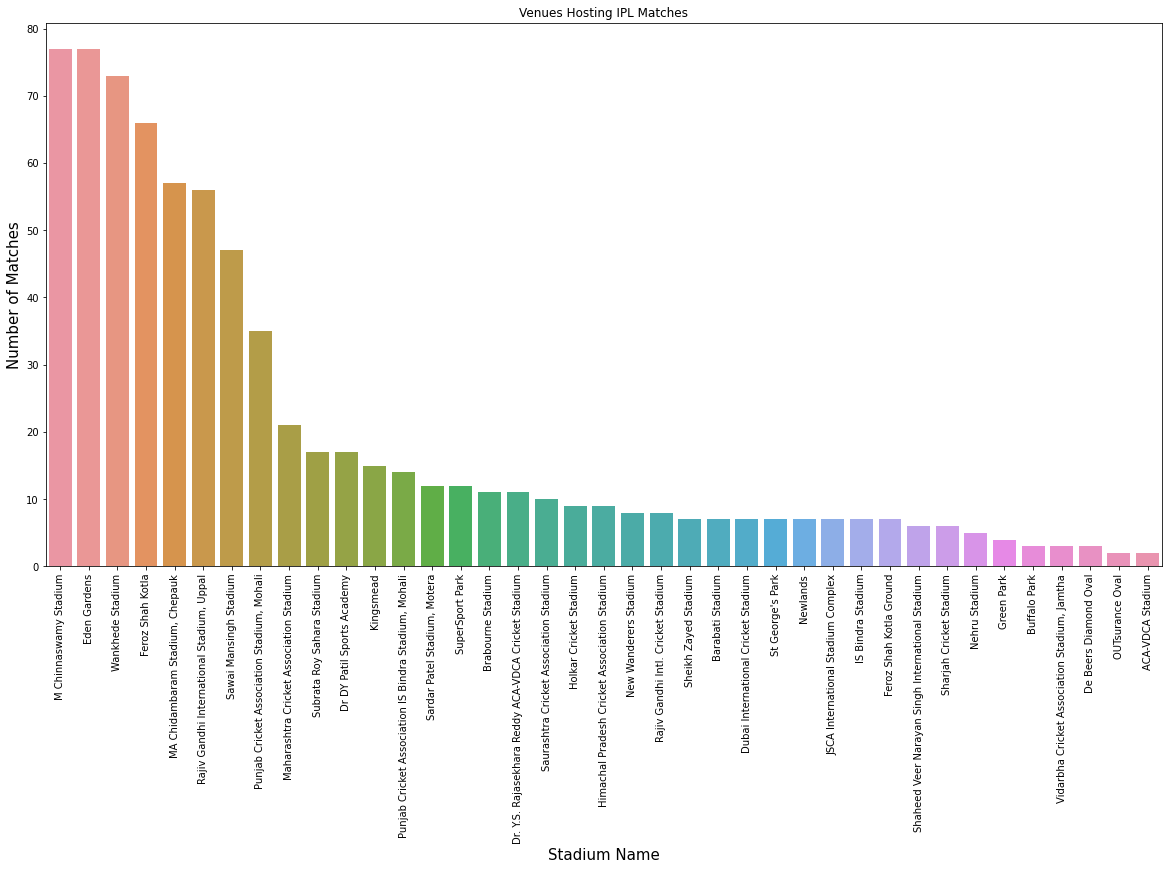

In [24]:
plt.figure(figsize=(20,10))
sn.barplot(venue_count.index,venue_count.values)
plt.title('Venues Hosting IPL Matches')
plt.ylabel('Number of Matches', fontsize=15)
plt.xlabel('Stadium Name', fontsize=15)
plt.xticks(rotation=90)
plt.show()

 M Chinnaswamy Stadium and Eden Gardens have hosted the maximum number of IPL matches followed by Wankhede Stadium and Feroz Shah Kotla.

**Which player has won the most number of Man of the Match (MoM) awards?**

In [25]:
counts_MoM=matches['player_of_match'].value_counts()
counts_MoM

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
                  ..
RP Singh           1
RS Bopara          1
B Stanlake         1
SP Goswami         1
A Singh            1
Name: player_of_match, Length: 226, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



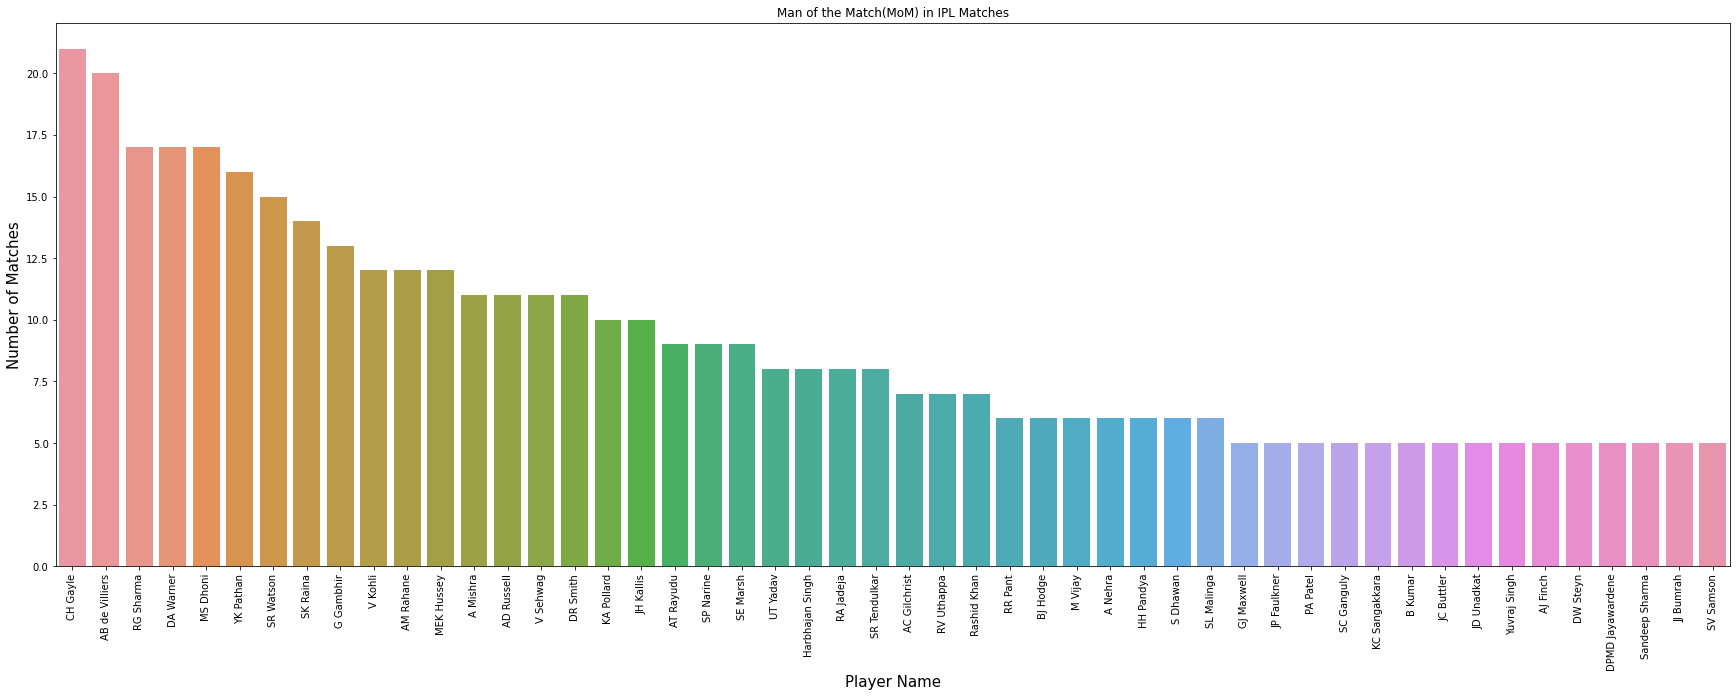

In [26]:
plt.figure(figsize=(30,10))
sn.barplot(counts_MoM.index[0:50],counts_MoM.values[0:50])
plt.title('Man of the Match(MoM) in IPL Matches')
plt.ylabel('Number of Matches', fontsize=15)
plt.xlabel('Player Name', fontsize=15)
plt.xticks(rotation=90)
plt.show()

*CH Gayle has won the most number of Man of the Match (MoM) awards followed by AB de Villers and MS Dhoni*

**Which team has won the most number/percentage of matches?**

In [27]:
counts_winner=matches['winner'].value_counts()
counts_winner

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bengaluru     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



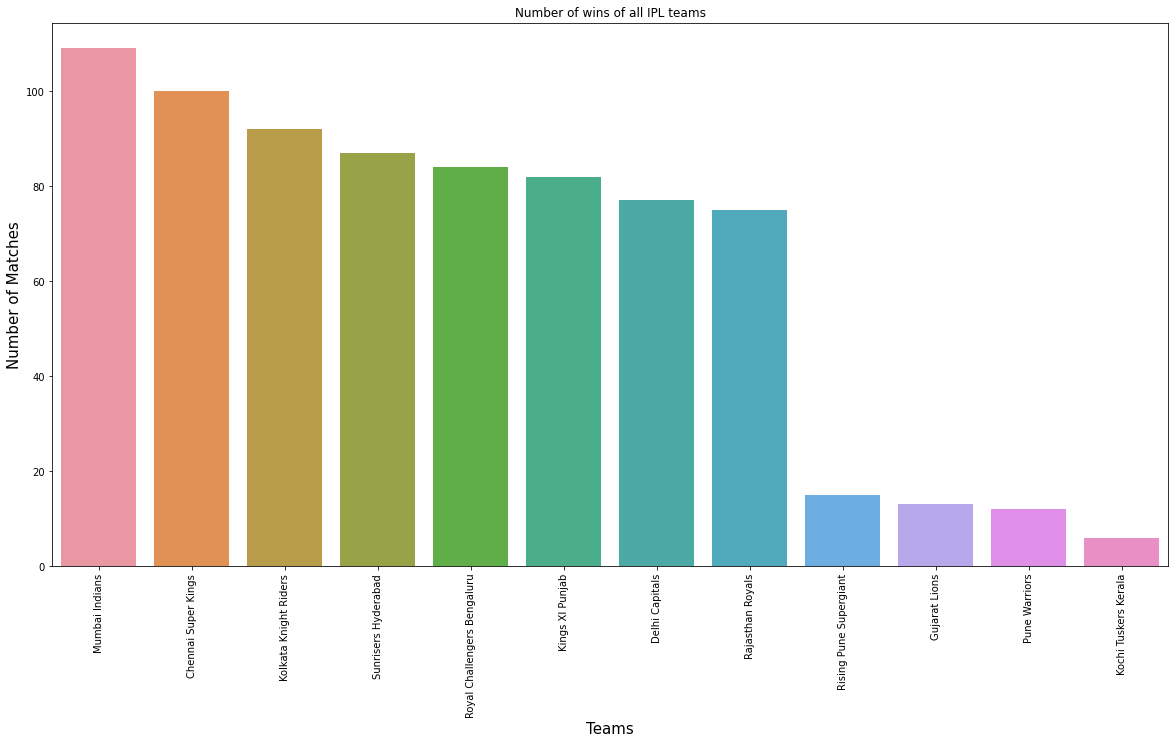

In [28]:
plt.figure(figsize=(20,10))
sn.barplot(counts_winner.index,counts_winner.values)
plt.title('Number of wins of all IPL teams')
plt.ylabel('Number of Matches', fontsize=15)
plt.xlabel('Teams', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Mumbai Indians has highest number of victories followed by Chennai Super Kings (though they missed two seasons) and Kochi Tuskers Kerala has least number of victories.

In [29]:
counts_winner_temp=matches['winner'].value_counts(sort=False)
counts_winner_team1=matches['team1'].value_counts(sort=False)
counts_winner_team2=matches['team2'].value_counts(sort=False)
percentage_win=counts_winner_temp.values*100/(counts_winner_team1.values+counts_winner_team2.values)
percentage_win

array([43.33333333, 46.59090909, 60.97560976, 50.        , 26.66666667,
       51.72413793, 47.54098361, 47.45762712, 42.85714286, 44.        ,
       51.68539326, 58.28877005])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



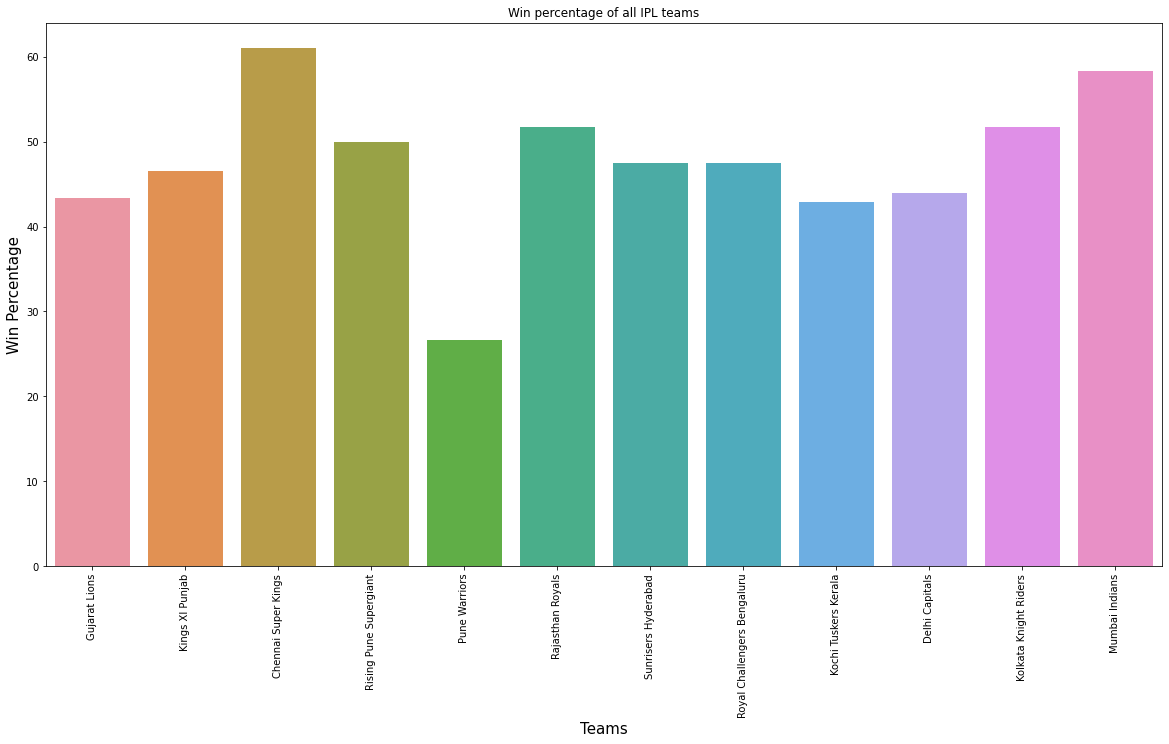

In [30]:
plt.figure(figsize=(20,10))
sn.barplot(counts_winner_temp.index,percentage_win)
plt.title('Win percentage of all IPL teams')
plt.ylabel('Win Percentage', fontsize=15)
plt.xlabel('Teams', fontsize=15)
plt.xticks(rotation=90)
plt.show()

This is a better representation as all teams have played different number of matches.
Chennai Super Kings has the highest winning percentage followed by Mumbai Indians. Pune Warriors has the lowest winning percentage.

**Which team has won the most tosses?**

In [31]:
counts_toss_winner=matches['toss_winner'].value_counts()
counts_toss_winner

Mumbai Indians                 98
Kolkata Knight Riders          92
Delhi Capitals                 89
Sunrisers Hyderabad            89
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bengaluru    80
Rajasthan Royals               78
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiant         13
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



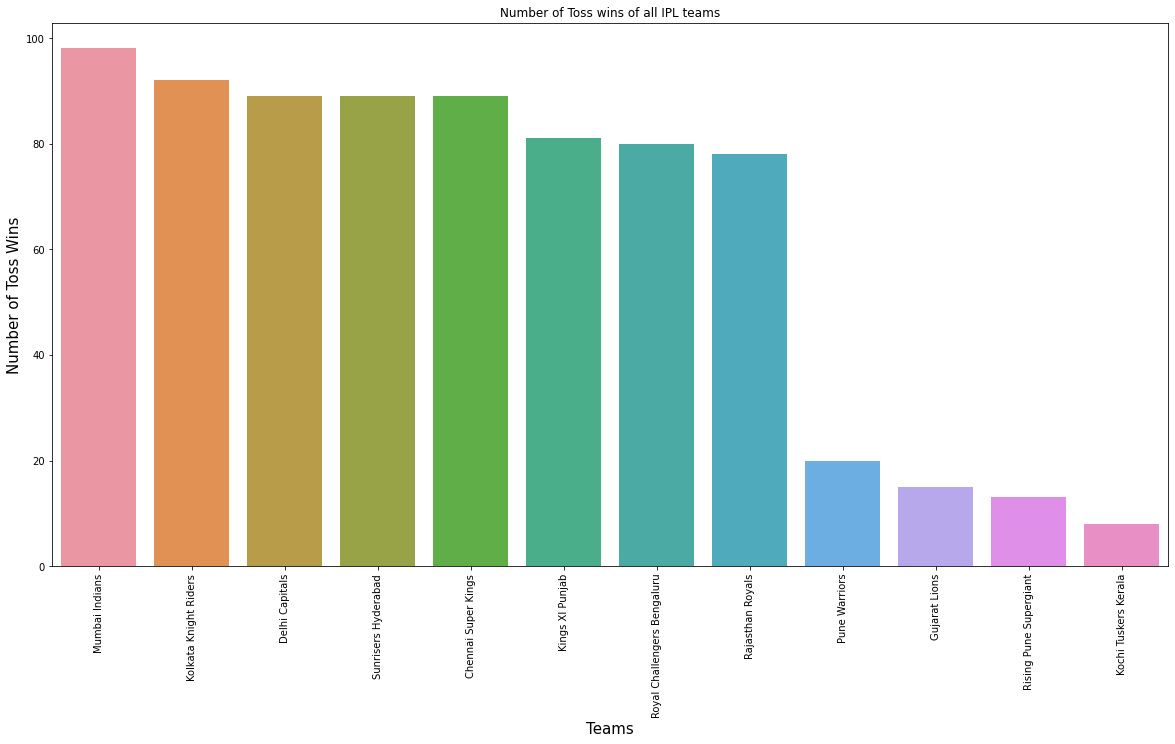

In [32]:
plt.figure(figsize=(20,10))
sn.barplot(counts_toss_winner.index,counts_toss_winner.values)
plt.title('Number of Toss wins of all IPL teams')
plt.ylabel('Number of Toss Wins', fontsize=15)
plt.xlabel('Teams', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Mumbai Indians has won most number of tossses followed by Kolkata Knight Riders.

In [33]:
counts_toss_winner_temp=matches['toss_winner'].value_counts(sort=False)
percentage_toss_win=counts_toss_winner_temp.values*100/(counts_winner_team1.values+counts_winner_team2.values)
percentage_toss_win

array([50.        , 46.02272727, 54.26829268, 43.33333333, 44.44444444,
       53.79310345, 48.63387978, 45.19774011, 57.14285714, 50.85714286,
       51.68539326, 52.40641711])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



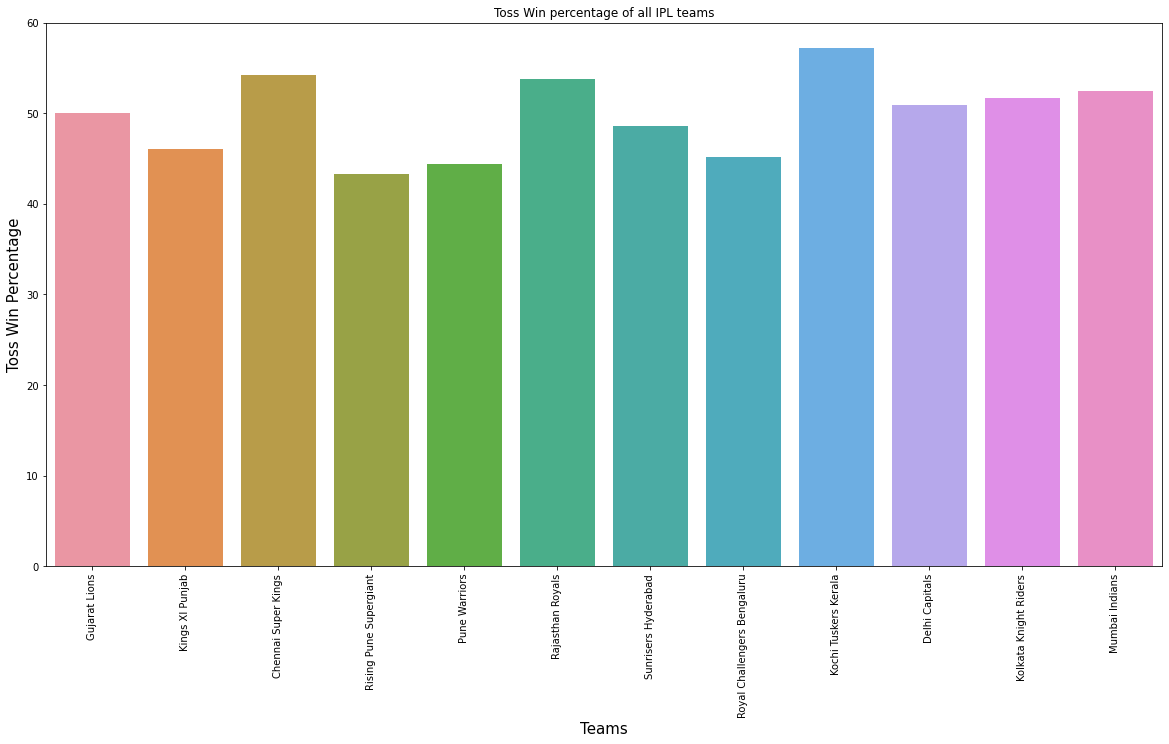

In [34]:
plt.figure(figsize=(20,10))
sn.barplot(counts_toss_winner_temp.index,percentage_toss_win)
plt.title('Toss Win percentage of all IPL teams')
plt.ylabel('Toss Win Percentage', fontsize=15)
plt.xlabel('Teams', fontsize=15)
plt.xticks(rotation=90)
plt.show()

This is a better representation as all teams have played different number of matches. Kolkata Knight Riders has the highest toss winning percentage followed by Gujrat Lions. Pune Warriors has the lowest toss winning percentage.



**What is the maximum number of wins by any team in particular seasons?**

In [35]:
teams= matches.groupby('season')
#teams.head()
teams_win_every_season=teams['winner'].value_counts()
teams_win_every_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Capitals                  7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bengaluru     5
Name: winner, Length: 100, dtype: int64

In [36]:
year = 2008
most_win_every_season = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_win_every_season.iteritems():    
    if items[0][0]==year:
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        most_win_every_season = most_win_every_season.append(win_series)
        year =year+ 1   

In [37]:
most_win_every_season

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Capitals,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



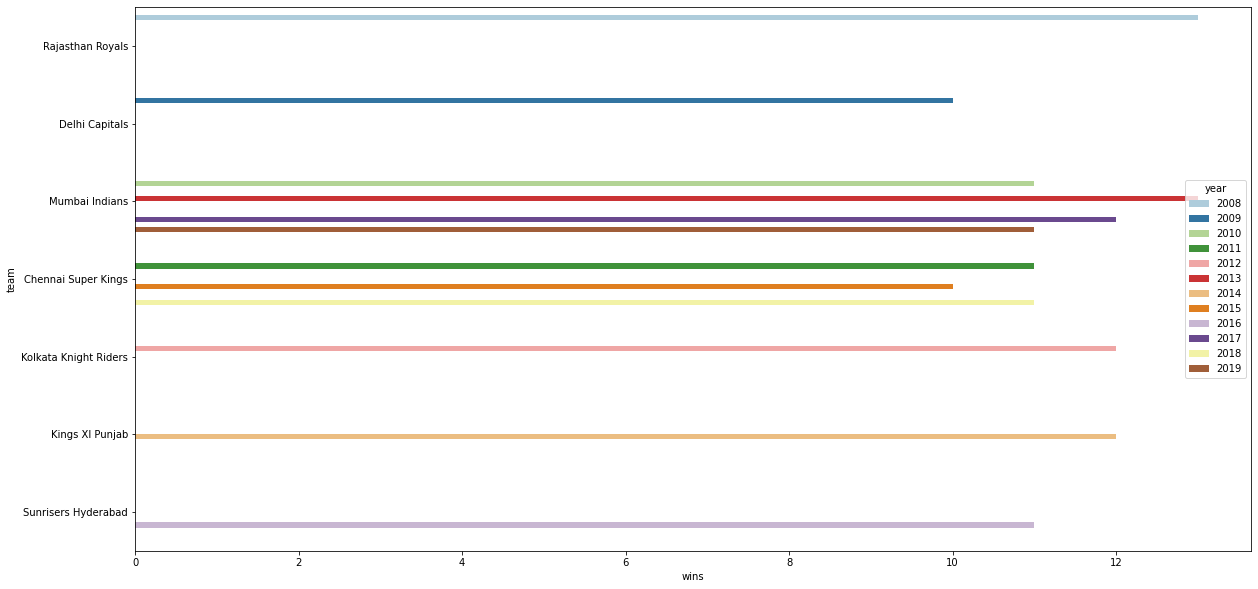

In [38]:
plt.figure(figsize=(20,10))
sn.barplot('wins', 'team', hue='year', data=most_win_every_season, palette='Paired')
plt.show()

**What are the top 10 greatest victories (by runs and by wickets)?**

In [39]:
winner_by_runs= matches[matches['win_by_runs'].isna()==False]
winner_by_wickets= matches[matches['win_by_wickets'].isna()==False]

In [40]:
sorted_winner_by_runs=winner_by_runs.sort_values(by=['win_by_runs'], ascending=False)
sorted_winner_by_runs

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan
619,620,2016,Bengaluru,2016-05-14,Royal Challengers Bengaluru,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bengaluru,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma
59,60,2008,Bengaluru,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
556,557,2015,Bengaluru,2015-05-06,Royal Challengers Bengaluru,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bengaluru,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni
410,411,2013,Bengaluru,2013-04-23,Royal Challengers Bengaluru,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bengaluru,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,473,2014,Sharjah,2014-04-27,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Delhi Capitals,0,6,M Vijay,Sharjah Cricket Stadium,Aleem Dar,VA Kulkarni
83,84,2008,Bengaluru,2008-05-05,Royal Challengers Bengaluru,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,S Sreesanth,M Chinnaswamy Stadium,SJ Davis,BR Doctrove
470,471,2014,Abu Dhabi,2014-04-26,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,PV Tambe,Sheikh Zayed Stadium,HDPK Dharmasena,C Shamshuddin
469,470,2014,Dubai,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus


In [41]:
sorted_winner_by_wickets=winner_by_wickets.sort_values(by=['win_by_wickets'], ascending=False)
sorted_winner_by_wickets

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
183,184,2010,Bengaluru,2010-03-18,Rajasthan Royals,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Royal Challengers Bengaluru,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,1,Delhi Capitals,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,2012,Chennai,2012-04-19,Chennai Super Kings,Pune Warriors,Pune Warriors,field,normal,0,Chennai Super Kings,13,0,KMDN Kulasekara,"MA Chidambaram Stadium, Chepauk",Asad Rauf,S Das
325,326,2012,Bengaluru,2012-04-15,Rajasthan Royals,Royal Challengers Bengaluru,Rajasthan Royals,bat,normal,0,Rajasthan Royals,59,0,AM Rahane,M Chinnaswamy Stadium,JD Cloete,RJ Tucker
324,325,2012,Kolkata,2012-04-15,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,2,0,SP Narine,Eden Gardens,Asad Rauf,S Asnani
318,319,2012,Mumbai,2012-04-11,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,27,0,KA Pollard,Wankhede Stadium,Aleem Dar,BNJ Oxenford


Top 10 greatest victories by runs

In [42]:
sorted_winner_by_runs.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan
619,620,2016,Bengaluru,2016-05-14,Royal Challengers Bengaluru,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bengaluru,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma
59,60,2008,Bengaluru,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
556,557,2015,Bengaluru,2015-05-06,Royal Challengers Bengaluru,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bengaluru,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni
410,411,2013,Bengaluru,2013-04-23,Royal Challengers Bengaluru,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bengaluru,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin
706,11147,2019,Hyderabad,31/03/19,Sunrisers Hyderabad,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Sunrisers Hyderabad,118,0,J Bairstow,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,KN Anantapadmanabhan
295,296,2011,Dharamsala,2011-05-17,Kings XI Punjab,Royal Challengers Bengaluru,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen
676,7934,2018,Kolkata,09/05/18,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,102,0,Ishan Kishan,Eden Gardens,Anil Chaudhary,K Ananthapadmanabhan
182,183,2010,Delhi,2010-03-17,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,98,0,SR Tendulkar,Feroz Shah Kotla,BR Doctrove,SK Tarapore


The biggest win by runs was recorded in 2017. Mumbai Indians won by 146 runs against Delhi Daredevils.

Top 10 greatest victories by wickets

In [43]:
sorted_winner_by_wickets.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
183,184,2010,Bengaluru,2010-03-18,Rajasthan Royals,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Royal Challengers Bengaluru,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,1,Delhi Capitals,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
683,7941,2018,Indore,14/05/18,Kings XI Punjab,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Royal Challengers Bengaluru,0,10,UT Yadav,Holkar Cricket Stadium,Bruce Oxenford,Virender Kumar Sharma
34,35,2017,Chandigarh,2017-04-30,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
542,543,2015,Delhi,2015-04-26,Delhi Capitals,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Royal Challengers Bengaluru,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel


In all top 10 wins by wickets, winning team has won by 10 tickets.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

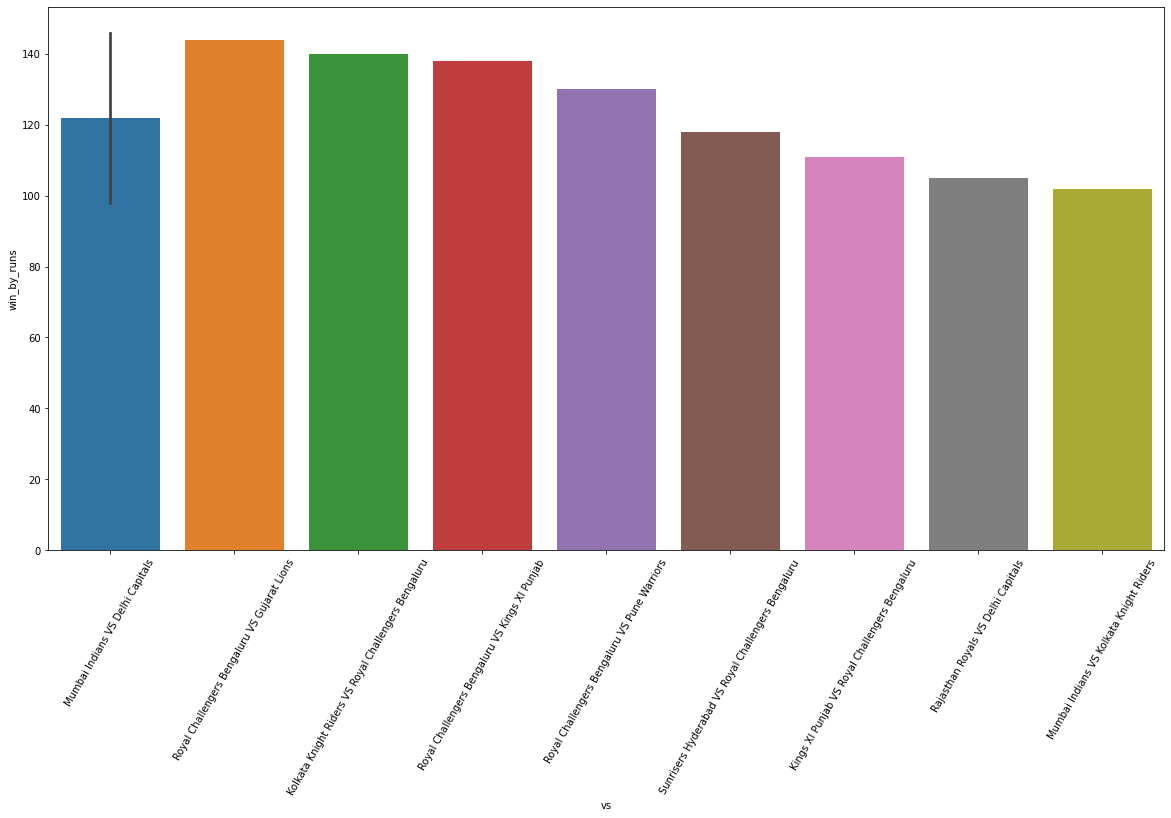

In [44]:
sorted_winner_by_runs['vs']=sorted_winner_by_runs['winner'] +' VS '+sorted_winner_by_runs['team2'] 
plt.figure(figsize=(20,10))
sn.barplot('vs','win_by_runs',data=sorted_winner_by_runs.head(10))
plt.xticks(rotation=60)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

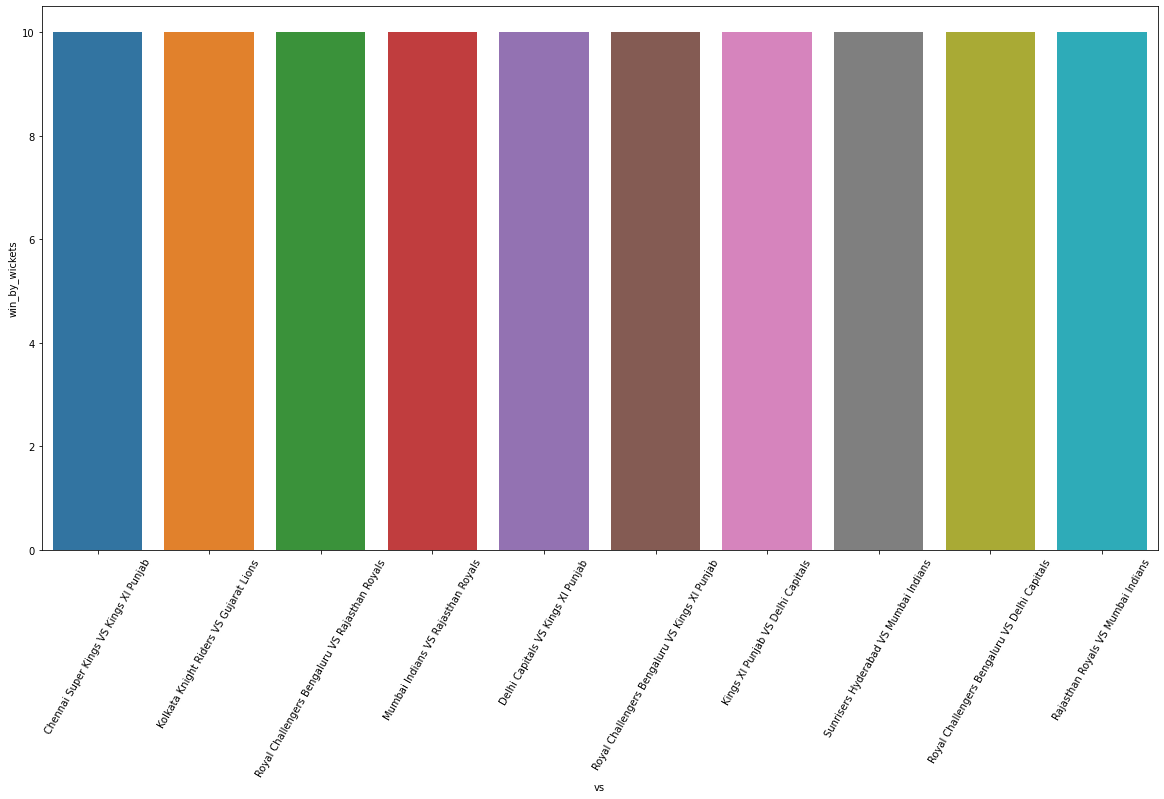

In [45]:
sorted_winner_by_wickets['vs']= sorted_winner_by_wickets['winner']+ " VS " + sorted_winner_by_wickets['team1']
plt.figure(figsize=(20,10))
sn.barplot('vs','win_by_wickets',data=sorted_winner_by_wickets.head(10))
plt.xticks(rotation=60)

**Most 50s and 100s scored.**

In [46]:
century = balls.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
century = century[century['batsman_runs']>=100]
century = century.groupby(['batsman']).agg({'count'})
century
century.columns = century.columns.droplevel()
century = century.sort_values(by='count',ascending=False)
century.reset_index(inplace=True)
century

,batsman,count
0,CH Gayle,7
1,V Kohli,5
2,DA Warner,4
3,SR Watson,4
4,AB de Villiers,3
5,HM Amla,2
6,AC Gilchrist,2
7,AM Rahane,2
8,V Sehwag,2
9,BB McCullum,2


C H Gayle has most number of centuries followed by V Kohli and DA Warner.

In [47]:
half_century = balls.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_century = half_century[half_century['batsman_runs']>=50]
half_century = half_century[half_century['batsman_runs']<100]
half_century = half_century.groupby(['batsman']).agg({'count'})
half_century.columns = half_century.columns.droplevel()
half_century = half_century.sort_values(by='count',ascending=False)
half_century.reset_index(inplace=True)
half_century

,batsman,count
0,DA Warner,44
1,V Kohli,38
2,SK Raina,38
3,S Dhawan,37
4,RG Sharma,36
...,...,...
144,S Vidyut,1
145,SA Yadav,1
146,DJ Hooda,1
147,LA Pomersbach,1


DA Warner has most number of half-centuries followed by V Kohli and SK Raina

Top 10 for century and half **century**

In [48]:
import plotly as py
from plotly import tools
from plotly.offline import init_notebook_mode,iplot
fig = {"data" : [{"x" : century['batsman'].head(10),"y" : century['count'].head(10),
                  "name" : "100s","marker" : {"color" : "lightblue","size": 10},
                  "line": {"width" : 3},"type" : "scatter","mode" : "lines+markers" ,
                  "xaxis" : "x1","yaxis" : "y1"},
        
                 {"x" : half_century['batsman'].head(10),"y" : half_century['count'].head(10),"name" : "50s","marker" : {"color" : "brown","size": 10},
                  "type" : "scatter","line": {"width" : 3},"mode" : "lines+markers",
                  "xaxis" : "x2","yaxis" : "y2"}],
       
        "layout" : {"title": "Total 50s & 100s by top batsman",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : True},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.60, 1],"anchor" : "x2","title": "50s"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear',"title": "Batsman"},
                    "yaxis" : {"domain" :[0, .40], "anchor" : "x2","title": "100s"}}}

iplot(fig)

**A bi-histogram plot for some Team1 vs Team2 with x axis as different years. This will give us an estimate of how the two teams perform against each other over the years**

In [49]:
def team1_vs_team2(team1, team2):
    vs=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sn.countplot(x='season', hue='winner',data=vs,palette='Set3')
    plt.xticks(rotation='vertical')
    leg = plt.legend( loc = 'upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,7)
    plt.show()


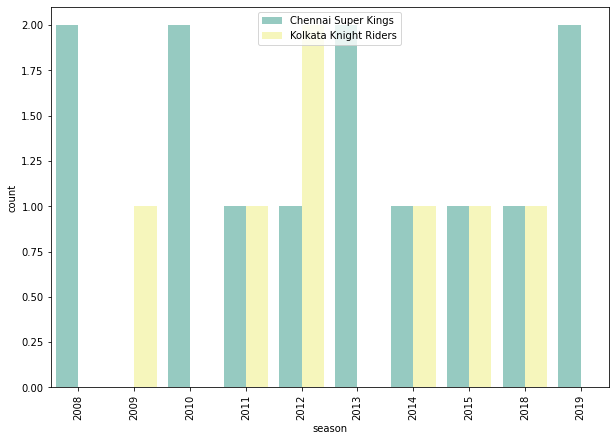

In [50]:
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')

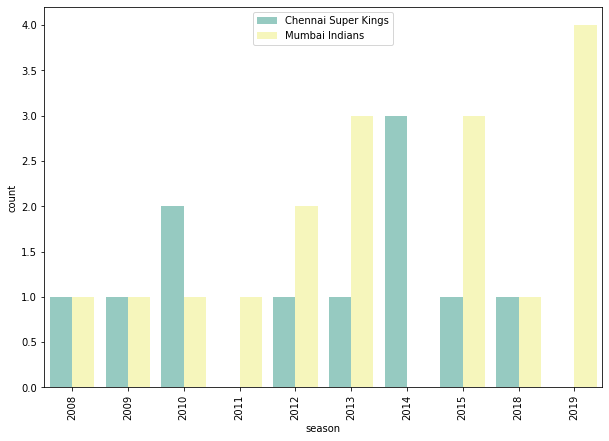

In [51]:
team1_vs_team2('Mumbai Indians','Chennai Super Kings')

**Task 9**

In [52]:
# identify top key
key='batsman'
top_batsmen=balls[key].value_counts()[:50].index

In [53]:
df_pt=balls.pivot_table(index=['batsman','over'],aggfunc=['count','sum'],values='batsman_runs' )

df_pt=df_pt.fillna(0).reset_index()
df_pt.columns=['batsman','over','balls','runs']
df_pt['strike_rate']=round(df_pt.runs/df_pt.balls*100,1)
df_pt

,batsman,over,balls,runs,strike_rate
0,A Ashish Reddy,5,2,0,0.0
1,A Ashish Reddy,6,5,5,100.0
2,A Ashish Reddy,12,1,1,100.0
3,A Ashish Reddy,13,9,9,100.0
4,A Ashish Reddy,14,15,22,146.7
...,...,...,...,...,...
5716,Z Khan,16,11,7,63.6
5717,Z Khan,17,16,5,31.2
5718,Z Khan,18,18,15,83.3
5719,Z Khan,19,30,41,136.7


In [54]:
import altair as alt

In [55]:
alt.data_transformers.disable_max_rows()

df_pt.columns
alt.Chart(df_pt[df_pt.batsman.isin(top_batsmen)]).mark_point(shape="circle").encode(
alt.X('over'),
alt.Y('mean(strike_rate)'),
color='batsman',
text="batsman",
size='balls',
opacity='runs',
tooltip=list(df_pt.columns)
).properties(width=600,height=500)

alt.Chart(...)